<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install pandas scikit-learn seaborn scipy

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [150]:
# Загрузка набора данных
df = pd.read_csv('/content/seeds.csv')
df

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [151]:
# проверка на пропущенные значения
print(df.isnull().sum())

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
length.1       0
dtype: int64


In [152]:
# Заполнение пропусков медианой
df_median = df.copy()
df_median.compactness = df_median.compactness.fillna(df_median.compactness.median())
df_median.width = df_median.width.fillna(df_median.width.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
length.1       0
dtype: int64


In [153]:
df_median['perfect_seed'] = np.where(df_median['asymmetry'] <= 4, 1, 0)
df_median.perfect_seed = df_median.perfect_seed.astype('category')

In [154]:
Y = df_median['perfect_seed'] # целевая переменная
X = df_median.drop('perfect_seed', axis=1) # переменные для проверки влияния

X = X.drop('asymmetry', axis=1)

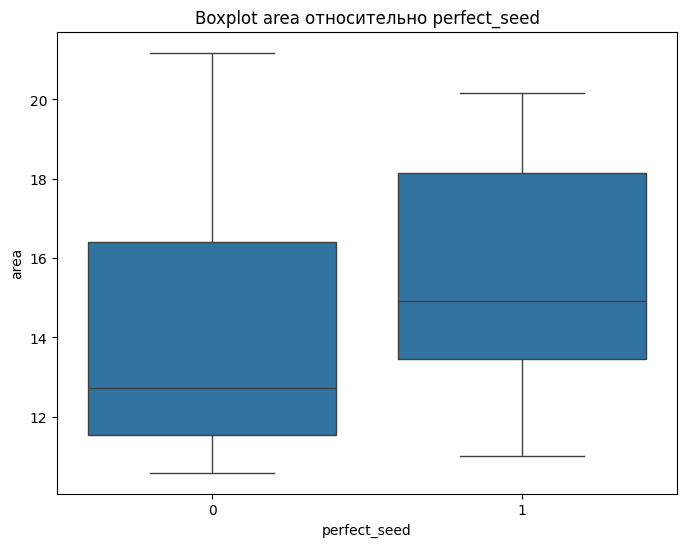

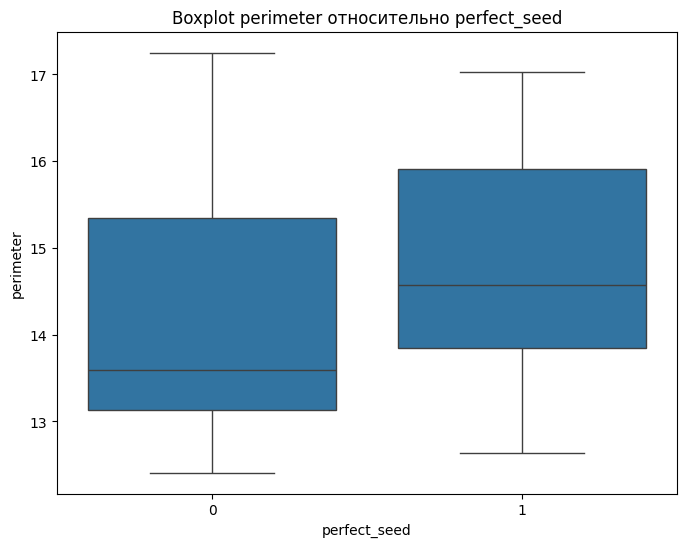

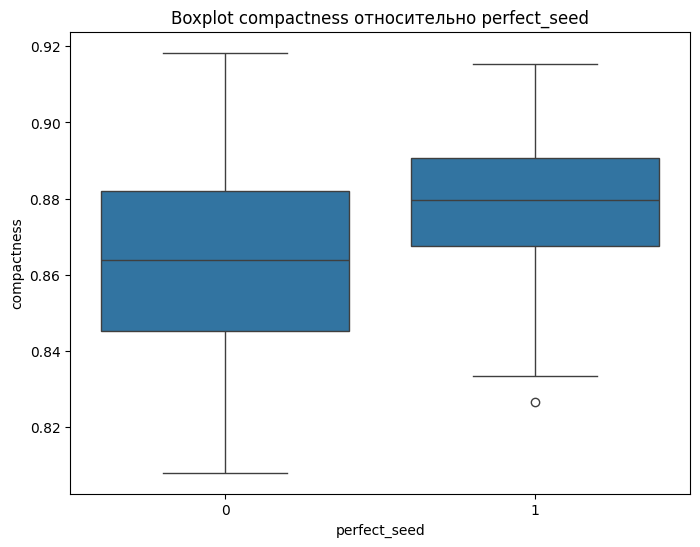

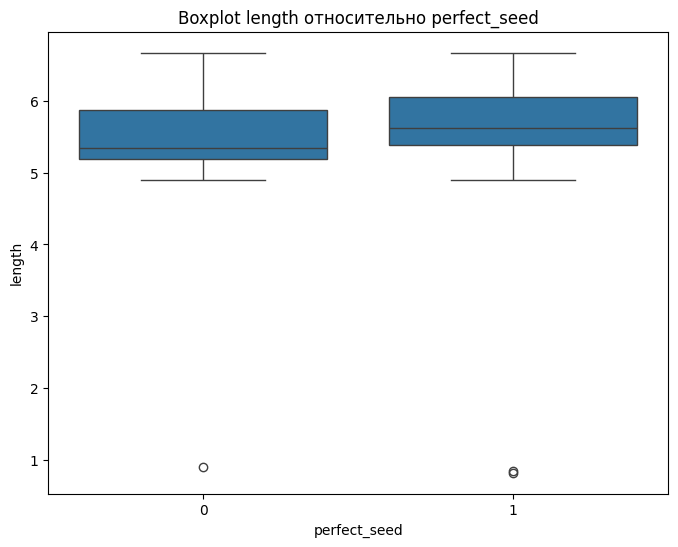

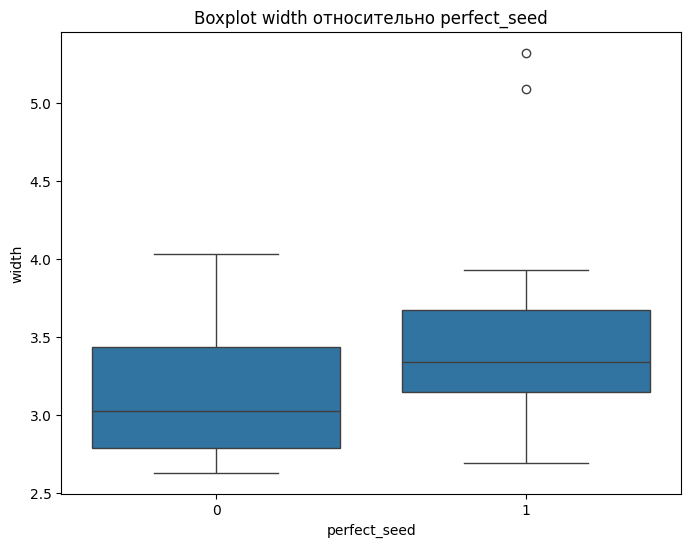

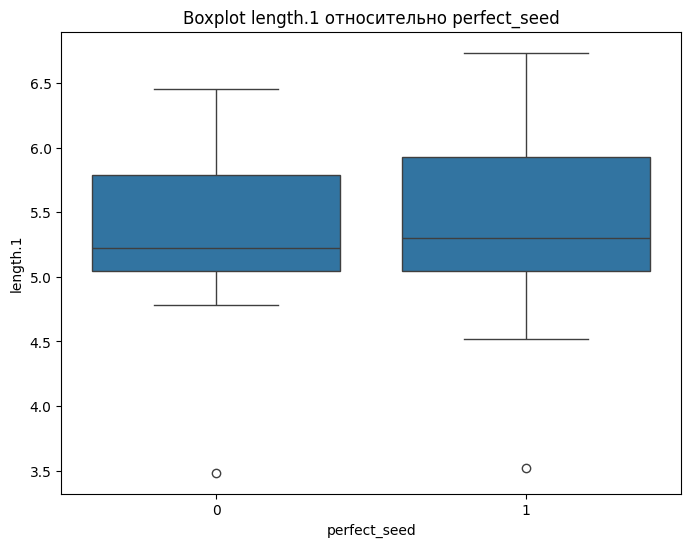

In [155]:
# numeric_cols = X.select_dtypes(include=['float64'])
# for col in numeric_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='perfect_seed', y=col, data=df_median)
#     plt.title(f'Boxplot {col} относительно perfect_seed')
#     plt.show()

In [156]:
df_median.drop('asymmetry', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area          210 non-null    float64 
 1   perimeter     210 non-null    float64 
 2   compactness   210 non-null    float64 
 3   length        210 non-null    float64 
 4   width         210 non-null    float64 
 5   length.1      210 non-null    float64 
 6   perfect_seed  210 non-null    category
dtypes: category(1), float64(6)
memory usage: 10.3 KB


In [157]:
df_median

,area,perimeter,compactness,length,width,asymmetry,length.1,perfect_seed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1


In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   length.1     210 non-null    float64
dtypes: float64(6)
memory usage: 10.0 KB


In [159]:
# Копия данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [160]:
X_processed

,area,perimeter,compactness,length,width,length.1
0,15.26,14.84,0.8710,5.763,3.312,5.220
1,14.88,14.57,0.8811,5.554,3.333,4.956
2,14.29,14.09,0.9050,5.291,3.337,4.825
3,13.84,13.94,0.8955,5.324,3.379,4.805
4,16.14,14.99,0.9034,5.658,3.562,5.175
...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,4.870
206,11.23,12.88,0.8511,5.140,2.795,5.003
207,13.20,13.66,0.8883,5.236,3.232,5.056
208,11.84,13.21,0.8521,5.175,2.836,5.044


In [161]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [162]:
X_processed

,area,perimeter,compactness,length,width,length.1
0,0.440982,0.502066,0.570780,0.844265,0.253061,0.533846
1,0.405099,0.446281,0.662432,0.808576,0.260853,0.452615
2,0.349386,0.347107,0.879310,0.763665,0.262338,0.412308
3,0.306893,0.316116,0.793103,0.769300,0.277922,0.406154
4,0.524079,0.533058,0.864791,0.826335,0.345826,0.520000
...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.737368,0.130241,0.426154
206,0.060434,0.097107,0.390200,0.737880,0.061224,0.467077
207,0.246459,0.258264,0.727768,0.754273,0.223377,0.483385
208,0.118036,0.165289,0.399274,0.743857,0.076438,0.479692


In [163]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [164]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.6786
Точность на тестовой выборке: 0.7143

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        18
           1       0.71      0.83      0.77        24

    accuracy                           0.71        42
   macro avg       0.71      0.69      0.70        42
weighted avg       0.71      0.71      0.71        42



LogisticRegression(max_iter=1000)

!!!!!!!!!!!!!!!

In [165]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [166]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [167]:
X_processed.describe()

,area,perimeter,compactness,length,width,length.1
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.573606,0.810269,0.241657,0.591503
std,0.274759,0.269826,0.209977,0.122879,0.155439,0.162219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.452132,0.755767,0.121336,0.480077
50%,0.355524,0.394628,0.593466,0.802428,0.228200,0.542154
75%,0.634089,0.682851,0.718920,0.881278,0.347032,0.736462
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
X_iqr.describe()

,area,perimeter,compactness,length,width,length.1
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.404844,0.446740,0.573319,0.821931,0.234817,0.595191
std,0.274439,0.269836,0.211487,0.075843,0.139596,0.150136
min,0.000000,0.000000,0.000000,0.696726,0.000000,0.318154
25%,0.164306,0.215909,0.450091,0.758799,0.120408,0.480308
50%,0.356941,0.400826,0.593466,0.803965,0.227087,0.547077
75%,0.637394,0.689050,0.721869,0.882857,0.346011,0.736308
max,1.000000,1.000000,1.000000,1.000000,0.520594,0.943077


In [169]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.6970
Точность на тестовой выборке: 0.6905

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.70      0.79      0.75        24

    accuracy                           0.69        42
   macro avg       0.69      0.67      0.68        42
weighted avg       0.69      0.69      0.69        42



LogisticRegression(max_iter=1000)

!!!!!!!!!!!

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression

In [171]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [172]:
selector.scores_

array([10.81859715,  9.44404699, 30.78286337,  1.87463167, 18.35542336,
        0.84722113])

In [173]:
X_processed.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'length.1'], dtype='object')

In [174]:
X_processed

,area,perimeter,compactness,length,width,length.1
0,0.440982,0.502066,0.570780,0.844265,0.253061,0.533846
1,0.405099,0.446281,0.662432,0.808576,0.260853,0.452615
2,0.349386,0.347107,0.879310,0.763665,0.262338,0.412308
3,0.306893,0.316116,0.793103,0.769300,0.277922,0.406154
4,0.524079,0.533058,0.864791,0.826335,0.345826,0.520000
...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.737368,0.130241,0.426154
206,0.060434,0.097107,0.390200,0.737880,0.061224,0.467077
207,0.246459,0.258264,0.727768,0.754273,0.223377,0.483385
208,0.118036,0.165289,0.399274,0.743857,0.076438,0.479692


In [175]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4])

In [176]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['area', 'perimeter', 'compactness', 'length', 'width'], dtype='object')


In [177]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.6905
Точность на тестовой выборке: 0.7143

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        18
           1       0.71      0.83      0.77        24

    accuracy                           0.71        42
   macro avg       0.71      0.69      0.70        42
weighted avg       0.71      0.71      0.71        42



LogisticRegression(max_iter=1000)

!!!!!!!!!!!!!!!!!!

In [178]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['area', 'perimeter', 'compactness', 'width', 'length.1'], dtype='object')


In [179]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.6845
Точность на тестовой выборке: 0.7143

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        18
           1       0.71      0.83      0.77        24

    accuracy                           0.71        42
   macro avg       0.71      0.69      0.70        42
weighted avg       0.71      0.71      0.71        42



!!!!!!!!!!!!!!

Коэффициенты модели без регуляризации: [[ 0.26470156  0.34560723  1.94358156  0.16800016  0.89273722 -0.62421349]]
Коэффициенты модели с регуляризацией: [[0.         0.         2.79594423 0.         0.2955321  0.        ]]
Отобранные признаки: Index(['compactness', 'width'], dtype='object')
Коэффициенты модели после отбора признаков: [[2.79729345 0.29432709]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


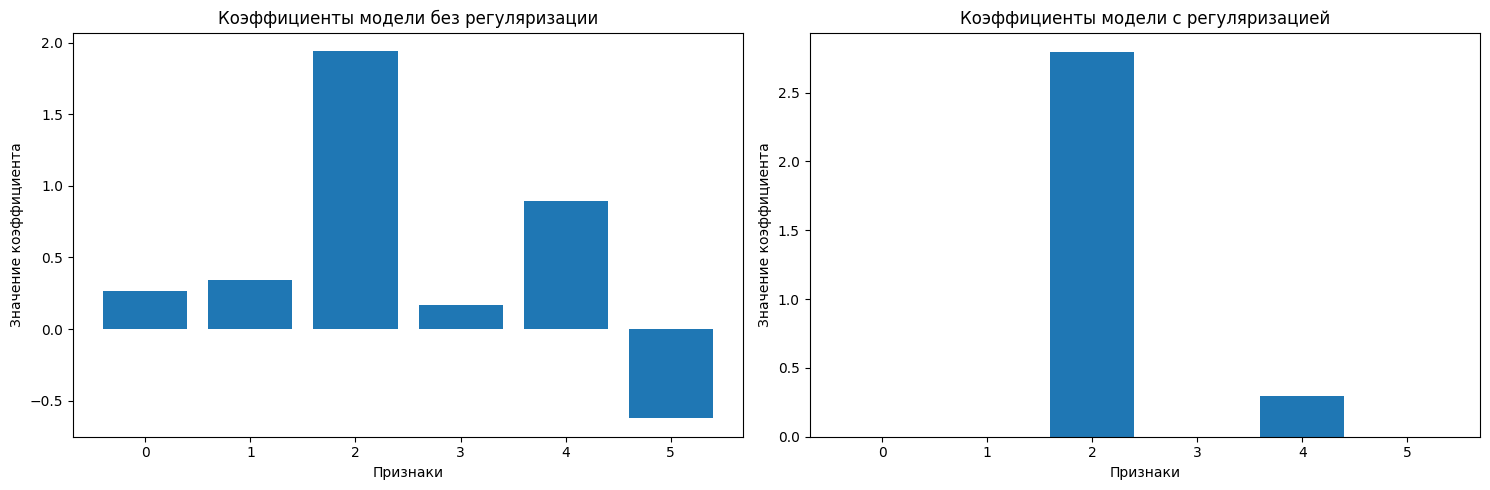

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [181]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.6786
Точность на тестовой выборке: 0.6905

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.69      0.83      0.75        24

    accuracy                           0.69        42
   macro avg       0.69      0.67      0.67        42
weighted avg       0.69      0.69      0.68        42



!!!!!!!!!!!!!!

In [182]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [183]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


!!!!!!!!!!!!!!!!

In [184]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [185]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.6952380952380952
Точности по каждому фолду: [0.6428571428571429, 0.7619047619047619, 0.6904761904761905, 0.7142857142857143, 0.6666666666666666]


In [186]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.7023809523809523
Точности по каждому разделению: [0.6904761904761905, 0.7142857142857143, 0.6547619047619048, 0.7261904761904762, 0.7261904761904762]


In [187]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.6428571428571429
Точность на тестовых данных: 0.8235294117647058
